# Assignment 2 Weather
# Author: Andre Hoarau

In [12]:
# We need to import.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [13]:
# Import the CSV file for the weather and make it into a pandas data frame
# Get a feel for the data
# Analyse the data types
weather_data = pd.read_csv("/Users/andre.hoarau/OneDrive - Accenture/Documents/Training/Higher Diploma in Science - Computing (Data Analyt/Semester2/PROGRAMMING FOR DATA ANALYTICS/PFDA-courseware/assignment/weatherreadings1.csv")
weather_data.head()
weather_data.dtypes
print(weather_data.columns)


Index(['siteId', 'reportStartDateTime', 'reportEndDateTime', 'collectionName',
       'isPublic', 'isLatestVersion', 'observationType', 'softwareType',
       'windDirection', 'relativeHumidity', 'windSpeed_MilePerHour',
       'windSpeed_MetrePerSecond', 'dryBulbTemperature_Fahrenheit',
       'dryBulbTemperature_Celsius', 'wetBulbTemperature_Fahrenheit',
       'wetBulbTemperature_Celsius', 'rainfallAmount_Inch',
       'rainfallAmount_Millimetre', 'rainfallRate_InchPerHour',
       'rainfallRate_MillimetrePerHour', 'airPressure_InchOfMercury',
       'airPressure_Hectopascal', 'dewPointTemperature_Fahrenheit',
       'dewPointTemperature_Celsius', 'isOfficial', 'isDcnn', 'longitude',
       'latitude', 'height', 'id', 'localReportEndDateTime', 'externalSiteId',
       'createdDateTime', 'version', 'externalId'],
      dtype='object')


In [14]:
# I want to change the "reportStartDateTime" from an object to a date.

weather_data["reportStartDateTime"]= pd.to_datetime(weather_data["reportStartDateTime"])
print(weather_data["reportStartDateTime"].dtypes)

'''
weather_data["reportStartDateTime"]= weather_data["reportStartDateTime"].str.split("+").str[0]
This is a rabbit hole I ended up going down
# I also want to seperate the date and the times and remove the +00:00
weather_data[["reportStartDate","reportStartTime"]]= weather_data["reportStartDateTime"].str.split("T",expand= True)
print((weather_data[["reportStartDate","reportStartTime"]].dtypes))

# I know will change the 2 columns to date time
weather_data[["reportStartDate","reportStartTime"]]= pd.to_datetime(weather_data[["reportStartDate","reportStartTime"]])
'''


datetime64[ns, UTC]


'\nweather_data["reportStartDateTime"]= weather_data["reportStartDateTime"].str.split("+").str[0]\nThis is a rabbit hole I ended up going down\n# I also want to seperate the date and the times and remove the +00:00\nweather_data[["reportStartDate","reportStartTime"]]= weather_data["reportStartDateTime"].str.split("T",expand= True)\nprint((weather_data[["reportStartDate","reportStartTime"]].dtypes))\n\n# I know will change the 2 columns to date time\nweather_data[["reportStartDate","reportStartTime"]]= pd.to_datetime(weather_data[["reportStartDate","reportStartTime"]])\n'

C:\Users\andre.hoarau\AppData\Local\Temp\ipykernel_23628\3709576134.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  x_ticks = pd.date_range(start=date.min(), end=date.max(), freq='2H')


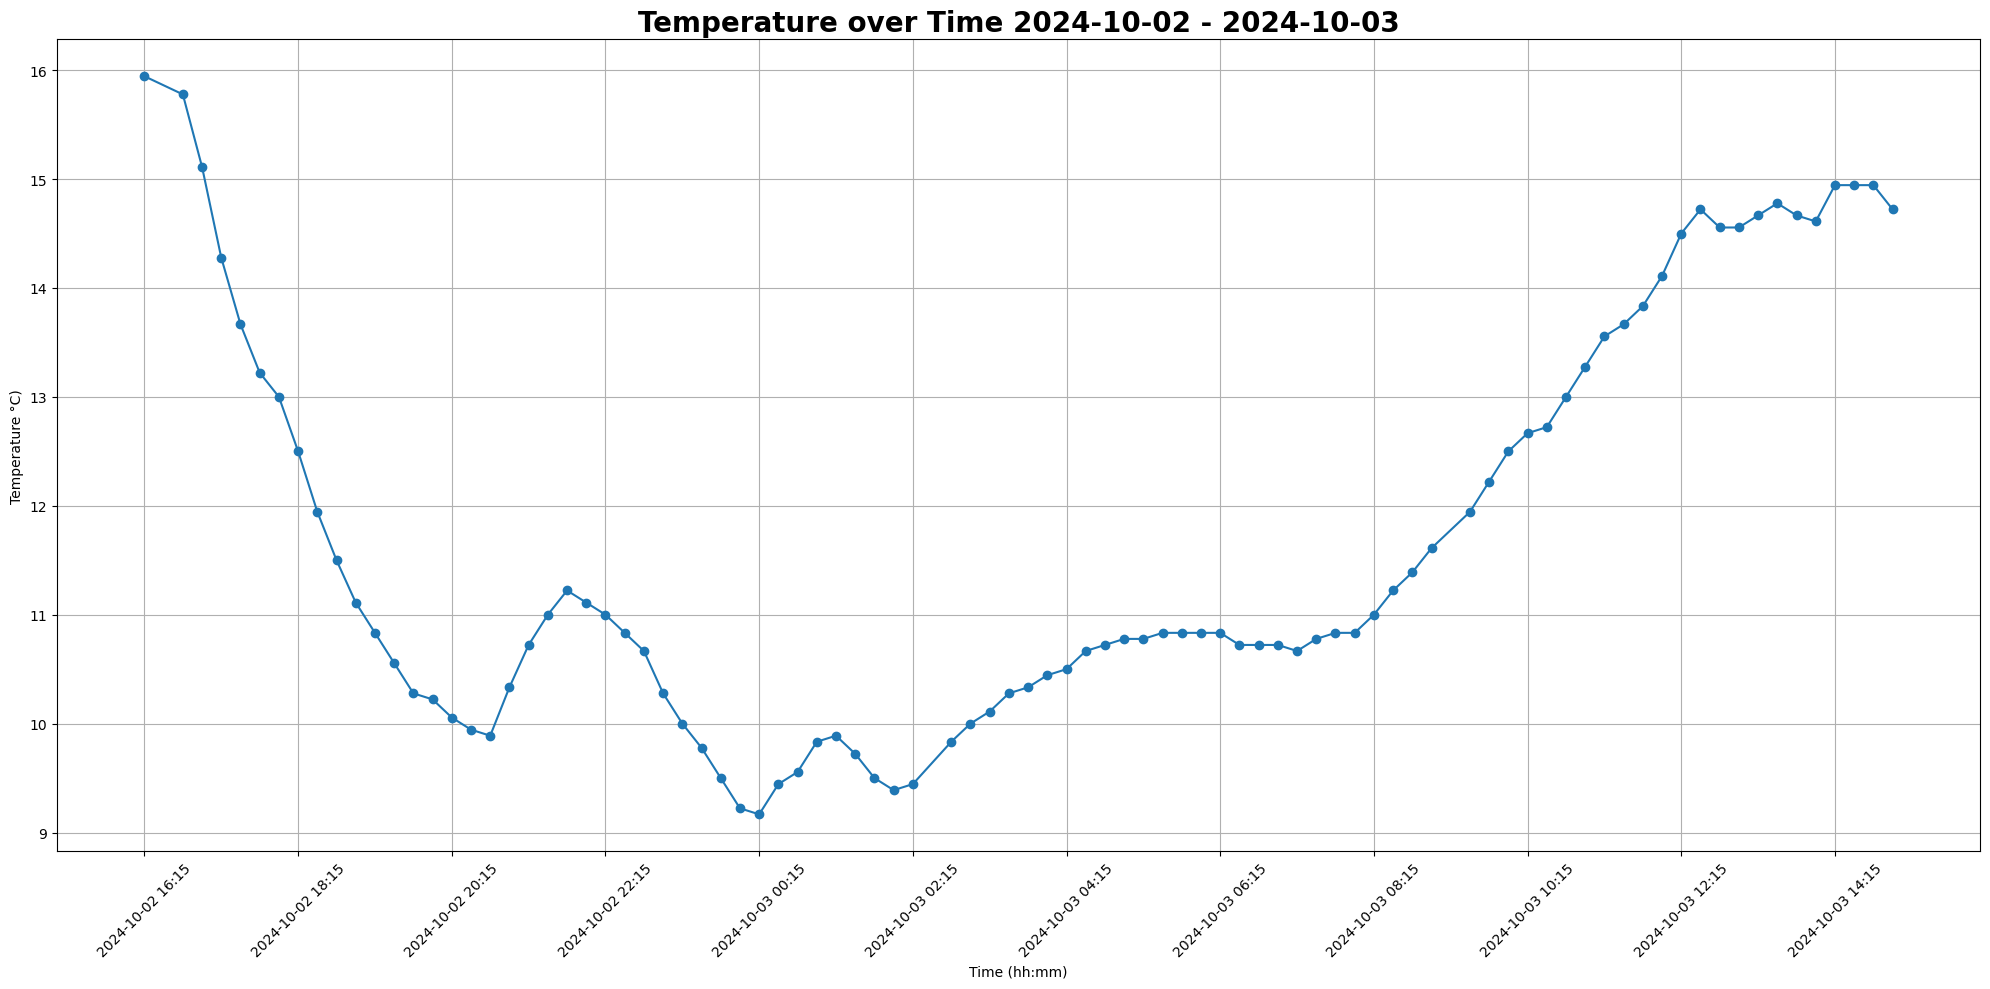

In [27]:
# Create variables to represent what we want to track.

date= weather_data["reportStartDateTime"]
temperature = weather_data[ "dryBulbTemperature_Celsius"]
fig, ax =plt.subplots(figsize=(20,10))
ax.plot(date,temperature, marker= "o")
ax.set(xlabel='Time (hh:mm)', ylabel='Temperature °C)')
ax.set_title( label='Temperature over Time 2024-10-02 - 2024-10-03',fontsize= 20, fontweight = "bold")

ax.grid("y")

x_ticks = pd.date_range(start=date.min(), end=date.max(), freq='2H')
ax.set_xticks(x_ticks)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

Resources used:
* https://www.datacamp.com/tutorial/pandas-read-csv This reminded me how to pull in the CSV and change it to a PANDAS data frame.
* https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py information on how to get the simple plot done.
* How to get data types: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
* 